# Prédiction du cancer du sein

### Importation des bibliothèques

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### Création des pipelines

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline= Pipeline([('std_scaler',StandardScaler())])

In [7]:
dataset = pd.read_csv('data.csv') #importation du fichier contenant les données 

### Analyse des données (et nettoyage)

In [9]:
dataset.head(20) #affiche les 20 premières lignes du dataset (du fichier data.csv)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,NaN


In [10]:
dataset = dataset.drop('Unnamed: 32', axis =1) #On supprime la colonne 'Unnamed: 32'

In [12]:
dataset.describe() #donne des informations statistiques du dataset

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [13]:
dataset.isnull().values.any() #vérifie si il y a des valeurs manquantes dans le dataset

False

### Aucune valeur nulle dans le dataset, on peut donc continuer

In [19]:
dataset.isnull().sum() #nombre de valeurs manquantes pour chaque colonne du dataset

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [20]:
dataset.shape #taille du datasat : 569 lignes et 32 colonnes

(569, 32)

In [23]:
dataset['diagnosis'].value_counts() #nombre de  cas pour chaque diagnostic (357 bénins, 212 malignes)

diagnosis
B    357
M    212
Name: count, dtype: int64

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'radius_mean'}>,
        <Axes: title={'center': 'texture_mean'}>,
        <Axes: title={'center': 'perimeter_mean'}>,
        <Axes: title={'center': 'area_mean'}>,
        <Axes: title={'center': 'smoothness_mean'}>],
       [<Axes: title={'center': 'compactness_mean'}>,
        <Axes: title={'center': 'concavity_mean'}>,
        <Axes: title={'center': 'concave points_mean'}>,
        <Axes: title={'center': 'symmetry_mean'}>,
        <Axes: title={'center': 'fractal_dimension_mean'}>,
        <Axes: title={'center': 'radius_se'}>],
       [<Axes: title={'center': 'texture_se'}>,
        <Axes: title={'center': 'perimeter_se'}>,
        <Axes: title={'center': 'area_se'}>,
        <Axes: title={'center': 'smoothness_se'}>,
        <Axes: title={'center': 'compactness_se'}>,
        <Axes: title={'center': 'concavity_se'}>],
       [<Axes: title={'center': 'concave points_se'}>,
        <Axes: title={'center': 's

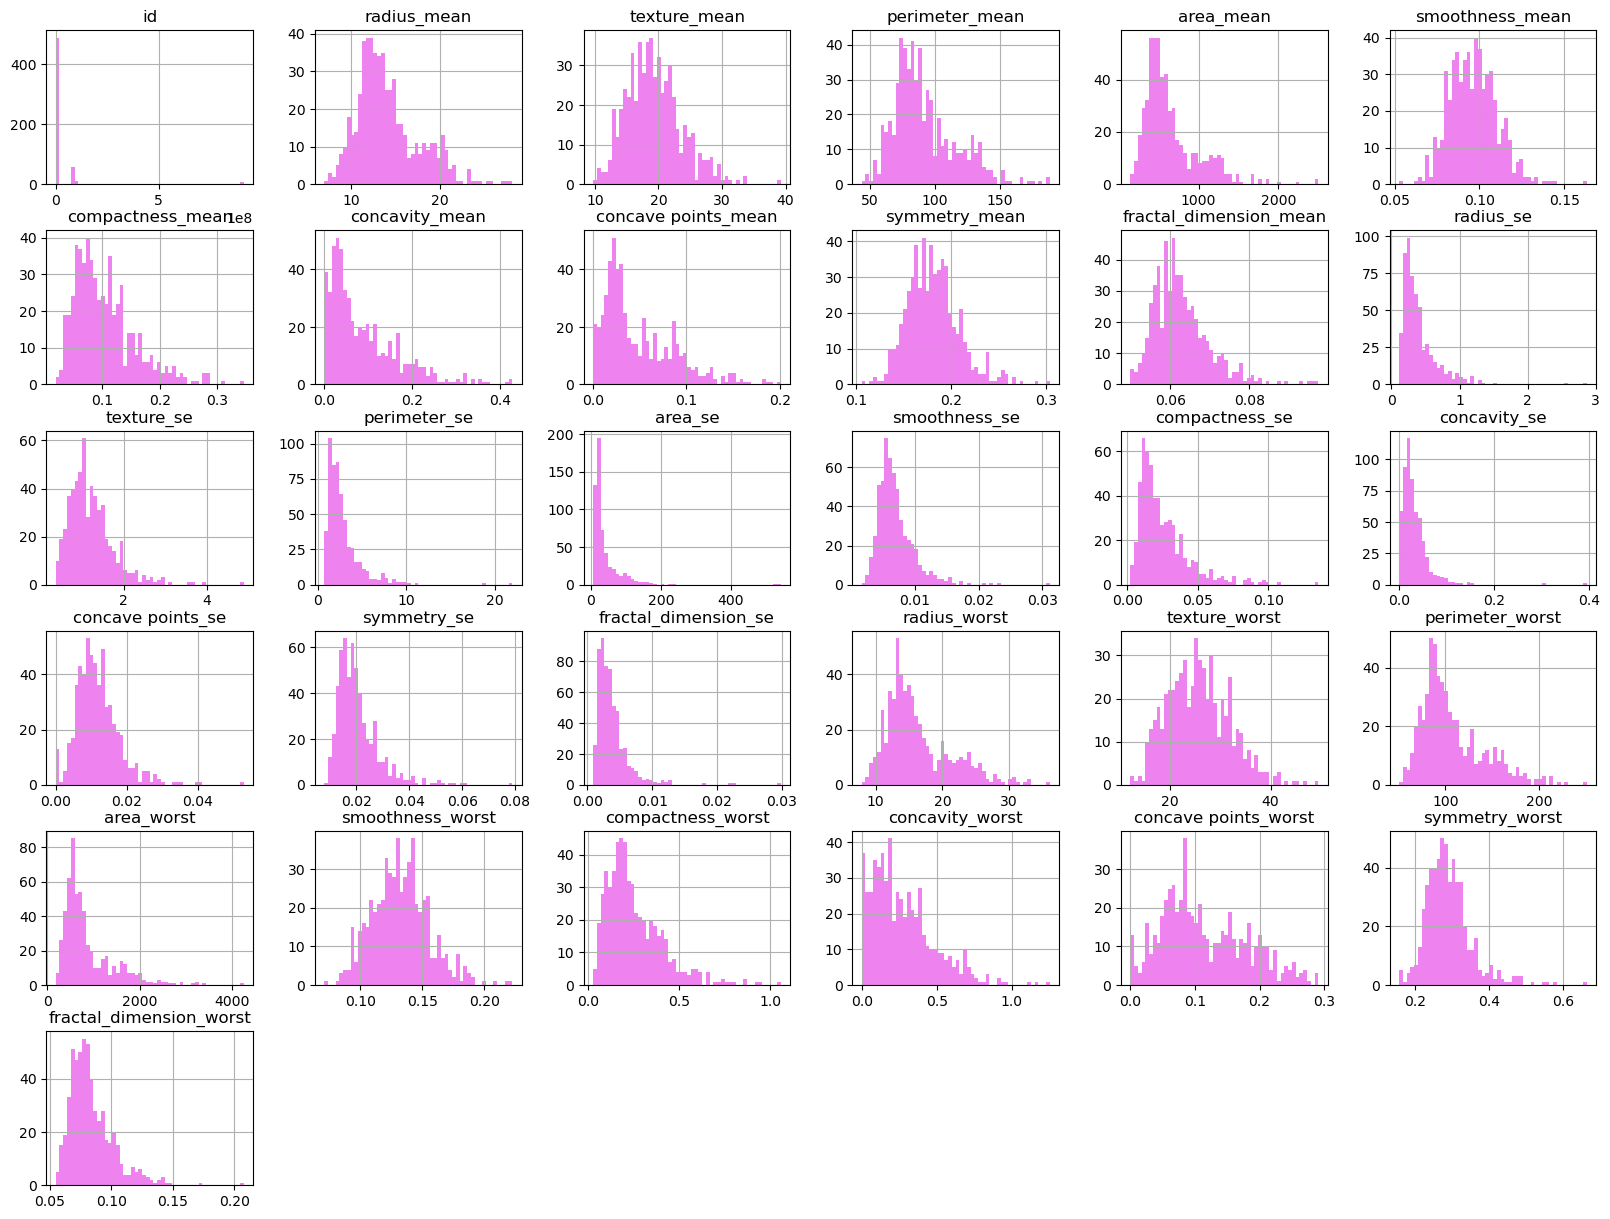

In [24]:
dataset.hist(bins=50,figsize=(20,15),color='violet',lw=0) #caractéristiques sous forme d'histogrammes 

### On sépare les données en deux parties (80% entraînement et 20% test)

In [28]:
X = dataset.iloc[:,2:].values #3ème colonne jusqu'à la dernière (input)
Y = dataset.iloc[:, 1:2].values #colonne diagnostic ( B ou M ) (output)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y.ravel()) #encoder B ou M en 1 ou 0

from sklearn.model_selection import train_test_split
#on garde 20% des données pour la phase de test
X_train_set,X_test_set,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=42)
print(f"Rows in X train set: {len(X_train_set)}\nRows in X test set: {len(X_test_set)}")

Rows in X train set: 455
Rows in X test set: 114


In [30]:
X_train=my_pipeline.fit_transform(X_train_set)
X_test= my_pipeline.transform(X_test_set)

In [49]:
#on a une erreur dans le code original
plt.figure(figsize=(20, 12))
matrix = np.triu(dataset.corr())
sns.heatmap(dataset.corr(), annot=True, linewidth=1, mask=matrix, cmap="magma");

ValueError: could not convert string to float: 'M'

<Figure size 2000x1200 with 0 Axes>

In [ ]:
#on corrige l'erreur 
plt.figure(figsize=(20, 12))
matrix = np.triu(dataset.select_dtypes(include=np.number).corr())
sns.heatmap(dataset.select_dtypes(include=np.number).corr(), annot=True, linewidth=1, mask=matrix, cmap="magma");

### On remarque que certaines caractéristiques ont des corrélations positive et négative très fortes :
perimeter_mean, radius_mean, area_mean, perimeter_worst, radius_worst, fractal_dimension_worst, fractal_dimension_meansmoothness_se, symmetry_se. 
### On peut donc tracer ces caractéristiques l'une par rapport à l'autre.

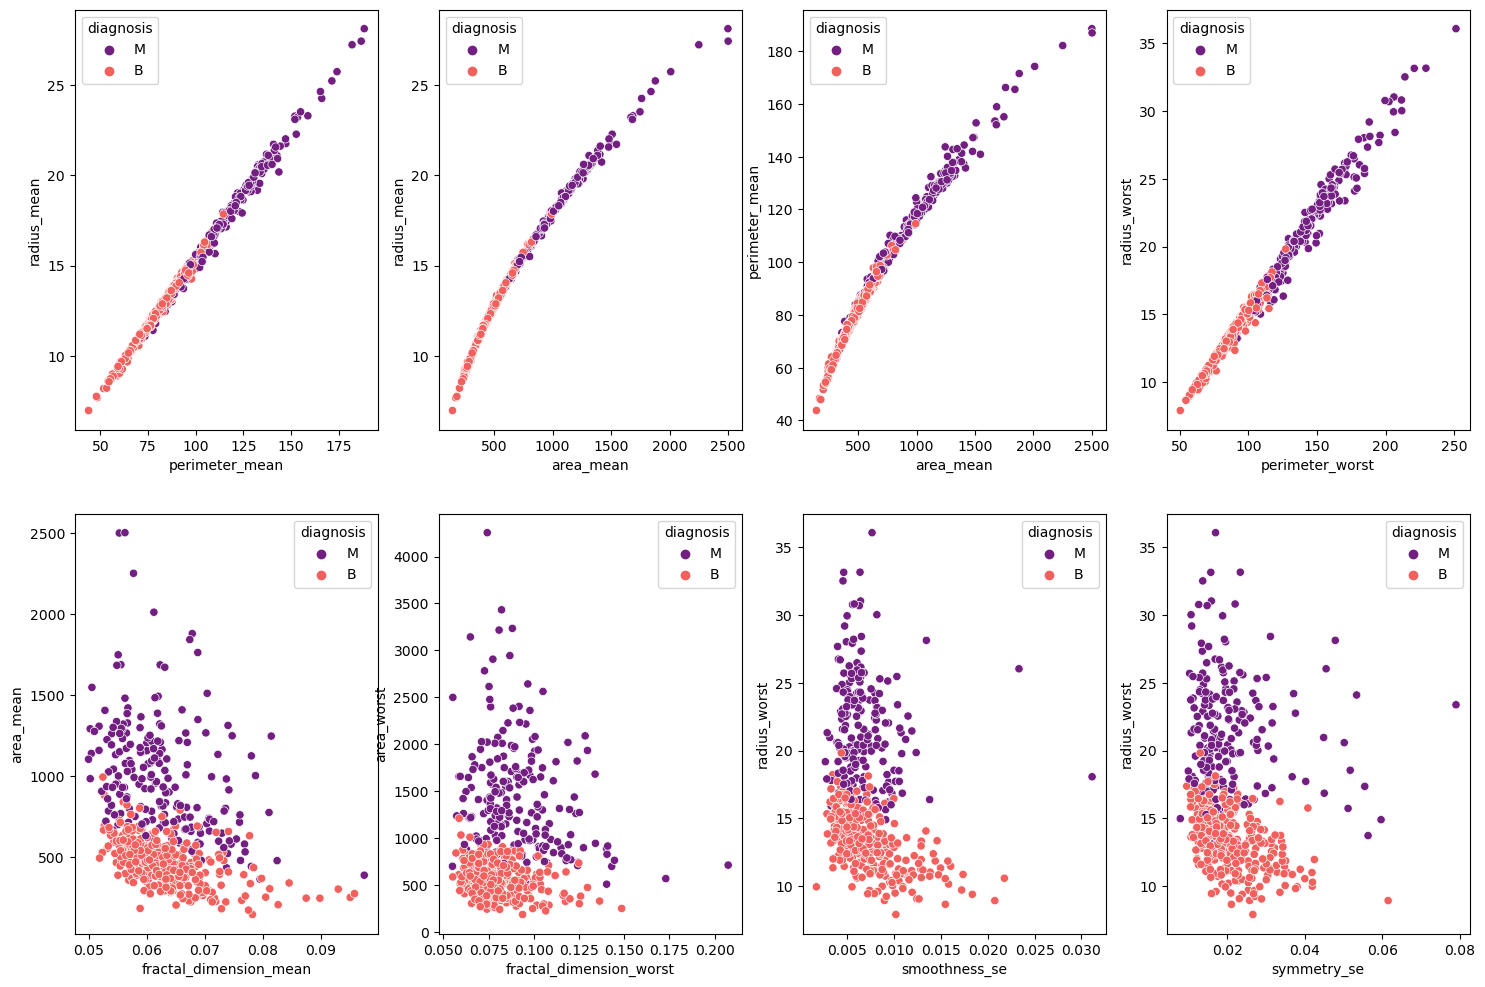

In [51]:
fig, ax = plt.subplots(2, 4, figsize=(18, 12))
sns.scatterplot(x='perimeter_mean', y='radius_mean', hue="diagnosis",
                data=dataset, ax=ax[0][0], palette='magma')
sns.scatterplot(x='area_mean', y='radius_mean', hue="diagnosis",
                data=dataset, ax=ax[0][1], palette='magma')
sns.scatterplot(x='area_mean', y='perimeter_mean', hue="diagnosis",
                data=dataset, ax=ax[0][2], palette='magma')
sns.scatterplot(x='perimeter_worst', y='radius_worst', hue="diagnosis",
                data=dataset, ax=ax[0][3], palette='magma')
sns.scatterplot(x='fractal_dimension_mean', y='area_mean', hue="diagnosis",
                data=dataset, ax=ax[1][0], palette='magma')
sns.scatterplot(x='fractal_dimension_worst', y='area_worst', hue="diagnosis",
                data=dataset, ax=ax[1][1], palette='magma')
sns.scatterplot(x='smoothness_se', y='radius_worst', hue="diagnosis",
                data=dataset, ax=ax[1][2], palette='magma')
sns.scatterplot(x='symmetry_se', y='radius_worst', hue="diagnosis",
                data=dataset, ax=ax[1][3], palette='magma');

## Évaluation de chaque modèle :

### Régression logistique

In [53]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression(random_state=0) #pour avoir des résultats reproductibles
model1.fit(X_train,Y_train) #entraînement du modèle

from sklearn.model_selection import cross_val_score 
scores1=cross_val_score(model1,X_train,Y_train,scoring="accuracy",cv=10) # cross validation
#rmse would be required in regression
#rmse_scores=np.sqrt(-scores)
#rmse_scores

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print('''Prediciting Test Set Result for Logistic Regression''')
Y_pred = model1.predict(X_test) #Prédiction sur notre modèle en utilisants les 20% données de tests
result = np.concatenate((Y_pred.reshape(len(Y_pred), 1),Y_test.reshape(len(Y_test), 1)), 1)
print(result,'\n')
print('''Making Confusion Matrix''')
Y_pred = model1.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred) #matrice de confusion
print(cm,'\n')
print('True Positives :',cm[0][0])
print('False Positives :',cm[0][1])
print('False Negatives :',cm[1][0])
print('True Negatives :', cm[0][1],'\n')

print('''Classification Report''')
print(classification_report(Y_test, Y_pred,target_names=['M', 'B'], zero_division=1))

print('''Evaluating Logistic Regression Model Performance''')
accuracy = accuracy_score(Y_test, Y_pred)
print(accuracy,'\n')

print('''Applying Cross validation''')
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(model1, X_train, Y_train, cv=10)
print("Accuracy for Logistic Regression: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation for Logistic Regression: {:.2f} %".format(accuracies.std()*100),'\n')

Prediciting Test Set Result for Logistic Regression
[[0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]] 

Making Confusion Matrix
[[70  1]
 [ 2 41]] 

True Positives : 70
False Positives : 1
False Negatives : 2
True Negatives : 1 

Classification Report

### Arbres de décision

In [56]:
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier()
model2.fit(X_train,Y_train)

from sklearn.model_selection import cross_val_score
scores2=cross_val_score(model2,X_train,Y_train,scoring="accuracy",cv=10)


from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print('''Prediciting Test Set Result for Decision Tree Classifier''')
Y_pred2 = model2.predict(X_test)
result2 = np.concatenate((Y_pred2.reshape(len(Y_pred2), 1),Y_test.reshape(len(Y_test), 1)), 1)
print(result2,'\n')
print('''Making Confusion Matrix''')
Y_pred2 = model2.predict(X_test)
cm2 = confusion_matrix(Y_test, Y_pred2)
print(cm2,'\n')
print('True Positives :',cm2[0][0])
print('False Positives :',cm2[0][1])
print('False Negatives :',cm2[1][0])
print('True Negatives :', cm2[0][1],'\n')

print('''Classification Report''')
print(classification_report(Y_test, Y_pred2,target_names=['M', 'B'], zero_division=1))

print('''Evaluating Decision Tree Classifier Model Performance''')
accuracy2 = accuracy_score(Y_test, Y_pred2)
print(accuracy2,'\n')

print('''Applying Cross validation''')
from sklearn.model_selection import cross_val_score
accuracies2 = cross_val_score(model2, X_train, Y_train, cv=10)
print("Accuracy for Decision Tree: {:.2f} %".format(accuracies2.mean()*100))
print("Standard Deviation for Decision Tree: {:.2f} %".format(accuracies2.std()*100),'\n')

Prediciting Test Set Result for Decision Tree Classifier
[[0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]] 

Making Confusion Matrix
[[67  4]
 [ 3 40]] 

True Positives : 67
False Positives : 4
False Negatives : 3
True Negatives : 4 

Classification R

In [58]:
from sklearn.ensemble import RandomForestClassifier
model3=RandomForestClassifier()
model3.fit(X_train,Y_train)

from sklearn.model_selection import cross_val_score
scores3=cross_val_score(model3,X_train,Y_train,scoring="accuracy",cv=10)


from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print('''Prediciting Test Set Result for Random Forest Classifier''')
Y_pred3 = model3.predict(X_test)
result3 = np.concatenate((Y_pred3.reshape(len(Y_pred3), 1),Y_test.reshape(len(Y_test), 1)), 1)
print(result3,'\n')
print('''Making Confusion Matrix''')
Y_pred3 = model3.predict(X_test)
cm3 = confusion_matrix(Y_test, Y_pred3)
print(cm3,'\n')
print('True Positives :',cm3[0][0])
print('False Positives :',cm3[0][1])
print('False Negatives :',cm3[1][0])
print('True Negatives :', cm3[0][1],'\n')

print('''Classification Report''')
print(classification_report(Y_test, Y_pred3,target_names=['M', 'B'], zero_division=1))

print('''Evaluating Random Forest Classifier Model Performance''')
accuracy3 = accuracy_score(Y_test, Y_pred3)
print(accuracy3,'\n')

print('''Applying Cross validation''')
from sklearn.model_selection import cross_val_score
accuracies3 = cross_val_score(model3, X_train, Y_train, cv=10)
print("Accuracy for Random Forest Classifier: {:.2f} %".format(accuracies3.mean()*100))
print("Standard Deviation for Random Forrest Classifier: {:.2f} %".format(accuracies3.std()*100),'\n')

Prediciting Test Set Result for Random Forest Classifier
[[0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]] 

Making Confusion Matrix
[[70  1]
 [ 3 40]] 

True Positives : 70
False Positives : 1
False Negatives : 3
True Negatives : 1 

Classification R

### Machines à vecteurs de support

In [60]:
from sklearn import svm
model4 = svm.SVC(kernel='linear') # Linear Kernel
model4.fit(X_train, Y_train)

from sklearn.model_selection import cross_val_score
scores4=cross_val_score(model4,X_train,Y_train,scoring="accuracy",cv=10)


from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print('''Prediciting Test Set Result for SVM''')
Y_pred4 = model4.predict(X_test)
result4 = np.concatenate((Y_pred4.reshape(len(Y_pred4), 1),Y_test.reshape(len(Y_test), 1)), 1)
print(result4,'\n')
print('''Making Confusion Matrix''')
Y_pred4 = model4.predict(X_test)
cm4 = confusion_matrix(Y_test, Y_pred4)
print(cm4,'\n')
print('True Positives :',cm4[0][0])
print('False Positives :',cm4[0][1])
print('False Negatives :',cm4[1][0])
print('True Negatives :', cm4[0][1],'\n')

print('''Classification Report''')
print(classification_report(Y_test, Y_pred4,target_names=['M', 'B'], zero_division=1))

print('''Evaluating SVM Performance''')
accuracy4 = accuracy_score(Y_test, Y_pred4)
print(accuracy4,'\n')

print('''Applying Cross validation''')
from sklearn.model_selection import cross_val_score
accuracies4 = cross_val_score(model4, X_train, Y_train, cv=10)
print("Accuracy for SVM: {:.2f} %".format(accuracies4.mean()*100))
print("Standard Deviation for SVM: {:.2f} %".format(accuracies4.std()*100),'\n')

Prediciting Test Set Result for SVM
[[0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]] 

Making Confusion Matrix
[[68  3]
 [ 2 41]] 

True Positives : 68
False Positives : 3
False Negatives : 2
True Negatives : 3 

Classification Report
              p

### k plus proches voisins

In [62]:
from sklearn.neighbors import KNeighborsClassifier
model5 = KNeighborsClassifier(n_neighbors = 8)
model5.fit(X_train, Y_train)

from sklearn.model_selection import cross_val_score
scores5=cross_val_score(model5,X_train,Y_train,scoring="accuracy",cv=10)


from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print('''Prediciting Test Set Result for KNeighbors Classifier''')
Y_pred5 = model5.p# Define the range of alpha values to search over

alphas = np.logspace(-4, 4, 9)


# Initialize a list to store the cross-validation scores

scores = []


# Perform cross-validation for each alpha value

for alpha in alphas:

    my_pipeline.set_params(ridge__alpha=alpha)

    scores.append(np.sqrt(-cross_val_score(my_pipeline, X_train, Y_train, cv=5, scoring='neg_mean_squared_error')).mean())


# Find the alpha value with the best cross-validation score

best_alpha = alphas[np.argmax(scores)]


print("Best alpha value:", best_alpha)

print("Corresponding mean squared error:", np.max(scores))


# Train the model with the best alpha value

my_pipeline.set_params(ridge__alpha=best_alpha)

my_pipeline.fit(X_train, Y_trainredict(X_test)
result5 = np.concatenate((Y_pred5.reshape(len(Y_pred5), 1),Y_test.reshape(len(Y_test), 1)), 1)
print(result5,'\n')
print('''Making Confusion Matrix''')
Y_pred5 = model5.predict(X_test)
cm5 = confusion_matrix(Y_test, Y_pred5)
print(cm5,'\n')
print('True Positives :',cm5[0][0])
print('False Positives :',cm5[0][1])
print('False Negatives :',cm5[1][0])
print('True Negatives :', cm5[0][1],'\n')

print('''Classification Report''')
print(classification_report(Y_test, Y_pred5,target_names=['M', 'B'], zero_division=1))

print('''Evaluating K Neighbours Classifier Model Performance''')
accuracy5 = accuracy_score(Y_test, Y_pred5)
print(accuracy5,'\n')

print('''Applying Cross validation''')
from sklearn.model_selection import cross_val_score
accuracies5 = cross_val_score(model5, X_train, Y_train, cv=10)
print("Accuracy for K  Neighbours Classifier: {:.2f} %".format(accuracies5.mean()*100))
print("Standard Deviation for K neighbours Classifiers: {:.2f} %".format(accuracies5.std()*100),'\n')

Prediciting Test Set Result for KNeighbors Classifier
[[0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]] 

Making Confusion Matrix
[[69  2]
 [ 3 40]] 

True Positives : 69
False Positives : 2
False Negatives : 3
True Negatives : 2 

Classification Repo

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/joblib/externals/loky/backend/context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/joblib/externals/loky/backend/context.py", line 217, in _count_physical_cores
    raise ValueError(


### Classification naïve bayésienne

In [65]:
from sklearn.naive_bayes import GaussianNB
model6 = GaussianNB()
model6.fit(X_train, Y_train)

from sklearn.model_selection import cross_val_score
scores6=cross_val_score(model6,X_train,Y_train,scoring="accuracy",cv=10)


from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print('''Prediciting Test Set Result for Naive Bayes''')
Y_pred6 = model6.predict(X_test)
result6 = np.concatenate((Y_pred6.reshape(len(Y_pred6), 1),Y_test.reshape(len(Y_test), 1)), 1)
print(result6,'\n')
print('''Making Confusion Matrix''')
Y_pred = model6.predict(X_test)
cm6 = confusion_matrix(Y_test, Y_pred6)
print(cm6,'\n')
print('True Positives :',cm6[0][0])
print('False Positives :',cm6[0][1])
print('False Negatives :',cm6[1][0])
print('True Negatives :', cm6[0][1],'\n')

print('''Classification Report''')
print(classification_report(Y_test, Y_pred6,target_names=['M', 'B'], zero_division=1))

print('''Evaluating Naive Bayes Model Performance''')
accuracy6 = accuracy_score(Y_test, Y_pred6)
print(accuracy6,'\n')

print('''Applying Cross validation''')
from sklearn.model_selection import cross_val_score
accuracies6 = cross_val_score(model6, X_train, Y_train, cv=10)
print("Accuracy for Naive Bayes: {:.2f} %".format(accuracies6.mean()*100))
print("Standard Deviation for Naive Bayes: {:.2f} %".format(accuracies6.std()*100),'\n')

Prediciting Test Set Result for Naive Bayes
[[0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]] 

Making Confusion Matrix
[[70  1]
 [ 3 40]] 

True Positives : 70
False Positives : 1
False Negatives : 3
True Negatives : 1 

Classification Report
       

#  Quel modèle marche le mieux pour notre dataset ?

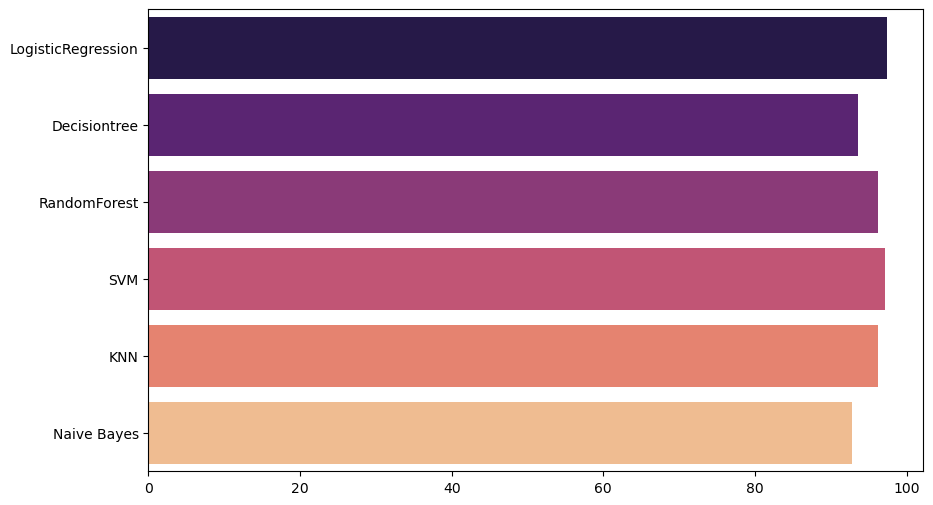

In [70]:
plt.figure(figsize=(10, 6))
model_accuracies = [accuracies.mean()*100,accuracies2.mean()*100,accuracies3.mean()*100,accuracies4.mean()*100,accuracies5.mean()*100,accuracies6.mean()*100]
model_names = ['LogisticRegression','Decisiontree','RandomForest','SVM', 'KNN','Naive Bayes']
sns.barplot(x=model_accuracies,y=model_names,palette='magma');

In [72]:
length=len(model_names)
for i in range(length):
    print(model_names[i],'Model Accuracy is:', model_accuracies[i],'%')

LogisticRegression Model Accuracy is: 97.3574879227053 %
Decisiontree Model Accuracy is: 93.6376811594203 %
RandomForest Model Accuracy is: 96.26086956521739 %
SVM Model Accuracy is: 97.14009661835748 %
KNN Model Accuracy is: 96.25120772946859 %
Naive Bayes Model Accuracy is: 92.73913043478261 %


# En conclusion, la régression logistique marche le mieux pour notre dataset